In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image

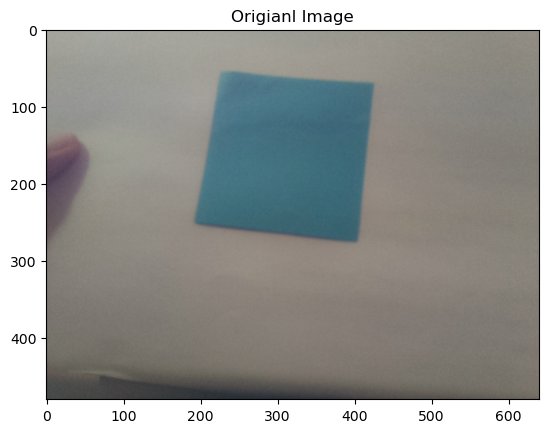

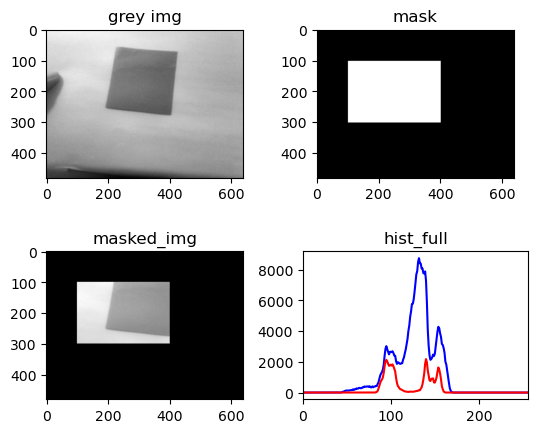

In [24]:
# Read the image from the path
img_path = r'C:\Users\****\Desktop\BlueColor.jpg'
img = cv2.imread(img_path, 0)
img2 = cv2.imread(img_path)

# Plot origival image
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Origianl Image')
plt.show()

# Create a 2D mask matrix with all zero elements (black area)
# This mask matrix has the same dimension as the first 2-dimension of img
mask = np.zeros(img.shape[:2], np.uint8)

# Create a white area (value=255) with width=300 pixels(100 to 299); height=200 pixels(100 to 399)
mask[100:300, 100:400] = 255

# "bitwise_and" calculates the per-element bit-wise conjunction of 2 arrays
# Mask is an optional operation mask, an 8-bit single-channel array, that specifies
# elements of the output array to be changed
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Calculate histogram with mask and without mask
# Check the third argument for the mask
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

# Add gap between upper and lower images
plt.subplots_adjust(hspace=0.5)

# Display images and histograms
plt.subplot(221), plt.imshow(img, 'gray'), plt.title('grey img')
plt.subplot(222), plt.imshow(mask, 'gray'), plt.title('mask')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('masked_img')
plt.subplot(224), plt.plot(hist_full, 'b-'), plt.plot(hist_mask, 'r-'), plt.title('hist_full')
plt.xlim([0, 256])

# Show plot
plt.show()